The first example of using the Agent Based Modeling (ABM) mechanism of SuperNeuro, called SuperNeuroABM. Here, we will create a simple network of three neurons, an input, a hidden and an output neuron, connected in a feedforward manner. We will apply input spikes to neuron 0, and observe spikes from all the neurons in the network.

In [3]:
#!pip install git+https://github.com/ORNL/superneuroabm

In [4]:
from superneuroabm.model import NeuromorphicModel

In [12]:
# Configure the simulation parameters:
sim_time = 100
neuron_threshold = 1.0
neuron_reset = -1.0
neuron_refractory = 1.0


snn_model = NeuromorphicModel(use_cuda=True)

neuron_in = snn_model.create_neuron(
            threshold=neuron_threshold,
            reset_state=neuron_reset,
            refactory_period=neuron_refractory,     # TODO: Chathika - It should be 'refractory'
            )

# Hidden Layer neuron:
neuron_h = snn_model.create_neuron(
            threshold=neuron_threshold,
            reset_state=neuron_reset,
            refactory_period=neuron_refractory,
            )

# Output neuron:
neuron_o = snn_model.create_neuron(
            threshold=neuron_threshold,
            reset_state=neuron_reset,
            refactory_period=neuron_refractory,
            )

# Create Synpase:
snn_model.create_synapse(neuron_in, neuron_h, 
            synaptic_delay = 2,
            weight = 4,
        )

snn_model.create_synapse(neuron_h, neuron_o,    # TODO: Chathika can you check why the neuron_h spikes are not available at end of simulation
            synaptic_delay = 3,                  
            weight = 2,
        )


In [13]:
# Apply Spikes:
snn_model.spike(neuron_in, 0, 2)    # (node_id, spike_time, spike_value)
snn_model.spike(neuron_in, 10, 4)

# Add the input spikes to the common list:
network_spikes = []
network_spikes.append([0, 10])

# Setup the model
snn_model.setup()

#Begin simulation:
snn_model.simulate(ticks=sim_time, update_data_ticks=1)

/home/8hk/superneuro-evaluation/new-env/lib/python3.10/site-packages/numba/cuda/compiler.py:726: NumbaPerformanceWarning: Grid size (1) < 2 * SM count (60) will likely result in GPU under utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


In [14]:
# Monitor the output spikes from all neurons:
out_spikes = snn_model.get_spikes(neuron_o)
h_spikes = snn_model.get_spikes(neuron_h)
in_spikes = snn_model.get_spikes(neuron_in)

print(in_spikes, h_spikes, out_spikes)
print(neuron_in, neuron_h, neuron_o)

[0, 10] [] []
0 1 2


[[0, 10], [0, 10], [], []]


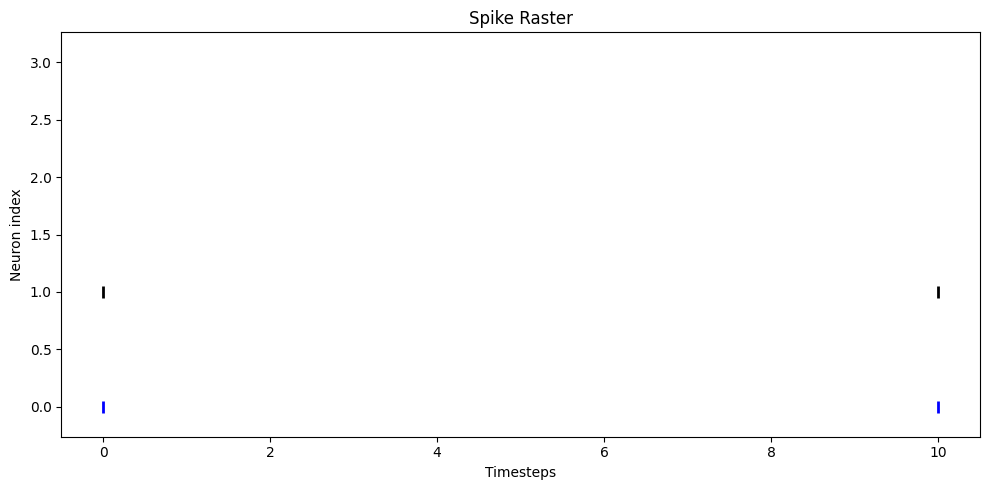

In [15]:
# Plot the spike raster:
#from superneuroabm.core.agent import *

import matplotlib.pyplot as plt

for n in range(3):
    network_spikes.append(snn_model.get_spikes(n))
print(network_spikes)

colors1 = ['b', 'k', 'k', 'k']  #Input spikes in blue and network spikes in black
fig, axs = plt.subplots(1,1,figsize=(10,5))
axs.eventplot(network_spikes,colors=colors1,lineoffsets=1,linelengths=0.1,linewidths=2.0)
plt.title('Spike Raster')
plt.xlabel('Timesteps')
plt.ylabel('Neuron index')
plt.tight_layout()
#plt.gca().invert_yaxis()